# Imports

In [27]:
# imports
import torch
from tueplots import bundles
import wandb
import matplotlib.pyplot as plt

import sys

%load_ext autoreload
%autoreload 2

sys.path.insert(0, '.')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [127]:
from analysis import sweep2df, learning_stats,corrected_jacobian_stats, RED, BLUE


In [3]:
plt.rcParams.update(bundles.neurips2022(usetex=True))
plt.rcParams.update({
    'text.latex.preamble': [r'\usepackage{amsfonts}', # mathbb
                            r'\usepackage{amsmath}'] # boldsymbol
})

/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/_collections_abc.py:834: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [4]:
# Constants
ENTITY = "causal-representation-learning"
PROJECT = "nl-causal-representations"

# W&B API
api = wandb.Api(timeout=200)
runs = api.runs(ENTITY + "/" + PROJECT)

# Data loading

In [5]:
SWEEP_ID = "gz1yqsuk"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_sweep_{SWEEP_ID}"
print(f"Loading sweep with {SWEEP_ID=}")
df1, (true_unmix_jacobians1, est_unmix_jacobians1, permute_indices1) = sweep2df(sweep.runs, filename, save=True, load=True)

SWEEP_ID = "5gzpzb23"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_sweep_{SWEEP_ID}"
print(f"Loading sweep with {SWEEP_ID=}")
df2, (true_unmix_jacobians2, est_unmix_jacobians2, permute_indices2) = sweep2df(sweep.runs, filename, save=True, load=True)

df = df1.append(df2)
true_unmix_jacobians = true_unmix_jacobians1 +true_unmix_jacobians2
est_unmix_jacobians = est_unmix_jacobians1+est_unmix_jacobians2
permute_indices = permute_indices1+permute_indices2

CommError: Could not find sweep <Sweep causal-representation-learning/nl-causal-representations/gz1yqsuk>

## 3D SEM

In [9]:

SWEEP_ID = "vfv1je0d" #"nz4r5d8a"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_3d_sweep_{SWEEP_ID}"
df3d, (true_unmix_jacobians3d, est_unmix_jacobians3d, permute_indices3d) = sweep2df(sweep.runs, filename, save=True, load=True)

## 5D SEM

In [10]:
SWEEP_ID = "f5nxtdxz" #"h6y1gkvo"#"3ldi48id"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_5d_sweep_{SWEEP_ID}"
df5d, (true_unmix_jacobians5d, est_unmix_jacobians5d, permute_indices5d) = sweep2df(sweep.runs, filename, save=True, load=True)

Encountered a faulty run with ID jolly-sweep-8


## 8D SEM

In [ ]:
SWEEP_ID = "7sscc3w1"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_8d_sweep_{SWEEP_ID}"
df8d, (true_unmix_jacobians8d, est_unmix_jacobians8d, permute_indices8d) = sweep2df(sweep.runs, filename, save=True, load=True)

Encountered a faulty run with ID apricot-sweep-49


## 10D SEM

In [12]:
SWEEP_ID = "7lsb5ud3"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sem_10d_sweep_{SWEEP_ID}"
df10d, (true_unmix_jacobians10d, est_unmix_jacobians10d, permute_indices10d) = sweep2df(sweep.runs, filename, save=True, load=True)

## MLP from Monti et al.

In [13]:
SWEEP_ID = "77huh2ue"#"q99ne3vj" #"fhaza97x"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"monti_sweep_{SWEEP_ID}"
df_monti, (true_unmix_jacobians_monti, est_unmix_jacobians_monti, permute_indices_monti) = sweep2df(sweep.runs, filename, save=True, load=True)

# Pre-processing


## Corrected stats

### 3D SEM

In [128]:
stats3d=corrected_jacobian_stats(df3d, true_unmix_jacobians3d, est_unmix_jacobians3d)

----------------------------------
dim=3 (nonlin_sem=False)	MCC=1.000+0.000	  Acc:1.000
----------------------------------
dim=3 (nonlin_sem=True)	MCC=1.000+0.000	  Acc:1.000


### 5D SEM

In [95]:
stats5d=corrected_jacobian_stats(df5d, true_unmix_jacobians5d, est_unmix_jacobians5d)

----------------------------------
dim=5 (nonlin_sem=True)	MCC=0.962+0.072	  Acc:1.000
----------------------------------
dim=5 (nonlin_sem=False)	MCC=1.000+0.000	  Acc:1.000


### 8D SEM

In [96]:
stats8d=corrected_jacobian_stats(df8d, true_unmix_jacobians8d, est_unmix_jacobians8d)

----------------------------------
dim=8 (nonlin_sem=True)	MCC=0.987+0.025	  Acc:1.000
----------------------------------
dim=8 (nonlin_sem=False)	MCC=1.000+0.000	  Acc:1.000


### 10D SEM

In [98]:
stats10d=corrected_jacobian_stats(df10d, true_unmix_jacobians10d, est_unmix_jacobians10d)

----------------------------------
dim=10 (nonlin_sem=True)	MCC=0.944+0.032	  Acc:1.000
----------------------------------
dim=10 (nonlin_sem=False)	MCC=0.985+0.027	  Acc:1.000


### MLP from Monti et al.

In [97]:
stats_monti=corrected_jacobian_stats(df_monti, true_unmix_jacobians_monti, est_unmix_jacobians_monti,selector_col="n_mixing_layer")

----------------------------------
dim=6 (n_mixing_layer=5)	MCC=0.848+0.020	  Acc:1.000
----------------------------------
dim=6 (n_mixing_layer=4)	MCC=0.833+0.014	  Acc:1.000
----------------------------------
dim=6 (n_mixing_layer=3)	MCC=0.932+0.087	  Acc:1.000
----------------------------------
dim=6 (n_mixing_layer=2)	MCC=0.999+0.000	  Acc:1.000
----------------------------------
dim=6 (n_mixing_layer=1)	MCC=1.000+0.000	  Acc:1.000


## Learning permutations

### 3D SEM

In [ ]:
learning_stats(df3d, true_unmix_jacobians3d, est_unmix_jacobians3d, permute_indices3d)

### 5D SEM

In [ ]:
learning_stats(df5d, true_unmix_jacobians5d, est_unmix_jacobians5d, permute_indices5d, 1e-3)

### 8D SEM

In [12]:
learning_stats(df8d, true_unmix_jacobians8d, est_unmix_jacobians8d, permute_indices8d, 1e-3)

Correct order identified
----------------------------------
true_jac=tensor([[1.0850, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.9611, 3.5985, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.4147, 4.0179, 2.0769, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.7145, 4.0698, 2.3540, 3.0299, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.8764, 3.3702, 2.4392, 3.5258, 2.2418, 0.0000, 0.0000, 0.0000],
        [1.6313, 2.3522, 1.3941, 2.1047, 1.8677, 2.3872, 0.0000, 0.0000],
        [1.1212, 2.8969, 2.0693, 3.0300, 3.6201, 2.0695, 1.2522, 0.0000],
        [1.7588, 3.3396, 1.7038, 2.6641, 2.6519, 1.6928, 2.2463, 2.7388]])
est_jac=tensor([[0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 1., 0., 1., 0.],
        [1., 1., 0., 1., 1., 1., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 1., 1., 1., 1., 0.],
        [0., 1., 1., 1., 1., 0., 1., 1.],
        [1., 1., 0., 0., 1., 1., 1.,

### 10D SEM

In [8]:
learning_stats(df10d, true_unmix_jacobians10d, est_unmix_jacobians10d, permute_indices10d, 1e-3)

----------------------------------
true_jac=tensor([[1.1922, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [1.9500, 3.7520, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [1.6217, 2.8972, 2.1334, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [1.0580, 2.2932, 2.2195, 1.6608, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [1.6683, 3.5299, 2.6947, 2.4147, 3.4664, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [1.0154, 2.9480, 2.0143, 1.6252, 3.6249, 2.3881, 0.0000, 0.0000, 0.0000,
         0.0000],
        [1.3168, 3.3697, 2.4557, 2.6948, 2.9257, 1.4711, 3.4429, 0.0000, 0.0000,
         0.0000],
        [1.3574, 4.1002, 2.1081, 2.3233, 2.8957, 1.6435, 3.2952, 2.4223, 0.0000,
         0.0000],
        [1.0870, 2.8801, 1.5293, 1.3736, 2.4271, 1.3763, 2.3635, 2.6303, 2.8053,
         0.0000],
        [1.9490, 2.4977, 2.2379, 2.5739, 3.5761, 2.1033, 3.5990, 

### MLP from Monti et al.

In [18]:
learning_stats(df_monti, true_unmix_jacobians_monti, est_unmix_jacobians_monti, permute_indices_monti, selector_col="n_mixing_layer", weight_threshold=None, hamming_threshold=1e-3, dag_permute=False)

----------------------------------
true_jac=tensor([[ 0.0025,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-0.0128,  0.0021,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0314, -0.0108,  0.0021,  0.0000,  0.0000,  0.0000],
        [-0.0772,  0.0332, -0.0109,  0.0016,  0.0000,  0.0000],
        [ 0.1414, -0.0690,  0.0295, -0.0095,  0.0022,  0.0000],
        [-0.2077,  0.1093, -0.0530,  0.0234, -0.0095,  0.0021]])
est_jac=tensor([[1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [0., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [0., 1., 1., 1., 0., 0.]])
tensor([[5.0000e-01, 5.0000e-01, 5.0000e-01, 4.0059e-15, 5.8765e-18, 0.0000e+00],
        [5.4537e-10, 1.0000e+00, 5.5369e-10, 5.5369e-10, 5.8286e-15, 0.0000e+00],
        [5.0000e-01, 5.0000e-01, 5.0000e-01, 4.2770e-07, 1.5501e-09, 0.0000e+00],
        [9.9999e-01, 1.5077e+00, 1.5077e+00, 1.5077e+00, 4.7045e-14, 0.0000e+00],
        [1.2109e+00, 1.2109e+0

# Plots

## Corrected stats

### Nonlinear

In [116]:
"""NL"""
selector = False

metric = "thresholds"
thresholds = torch.stack([stats3d[3][selector][metric], stats5d[5][selector][metric],stats8d[8][selector][metric],stats10d[10][selector][metric]])

metric = "precisions"
precisions_nl = torch.stack([stats3d[3][selector][metric], stats5d[5][selector][metric],stats8d[8][selector][metric],stats10d[10][selector][metric]])

metric = "recalls"
recalls_nl = torch.stack([stats3d[3][selector][metric], stats5d[5][selector][metric],stats8d[8][selector][metric],stats10d[10][selector][metric]])

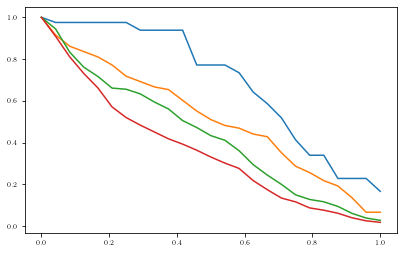

In [123]:
plt.plot(thresholds.T, recalls_nl.T)

### Linear

In [119]:
"""Linear"""
selector = True

# thresholds are the same

metric = "precisions"
precisions_lin = torch.stack([stats3d[3][selector][metric], stats5d[5][selector][metric],stats8d[8][selector][metric],stats10d[10][selector][metric]])

metric = "recalls"
recalls_lin = torch.stack([stats3d[3][selector][metric], stats5d[5][selector][metric],stats8d[8][selector][metric],stats10d[10][selector][metric]])

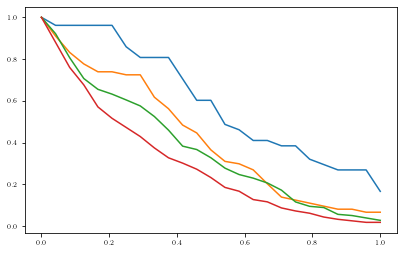

In [124]:
plt.plot(thresholds.T, recalls_lin.T)